In [3]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

1차원 분포 플롯

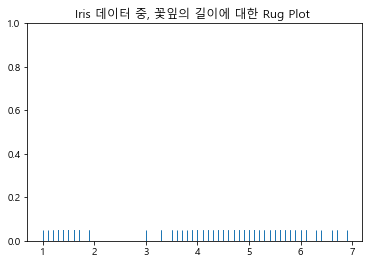

In [5]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

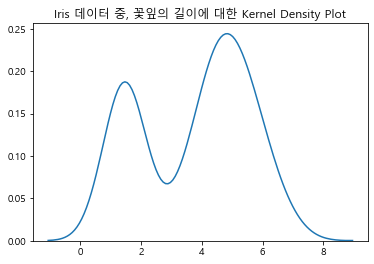

In [6]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

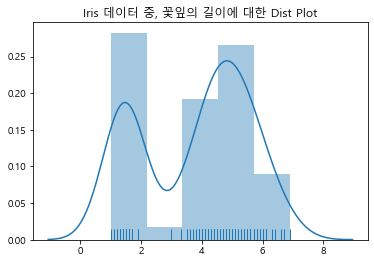

In [7]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

카운트 플롯

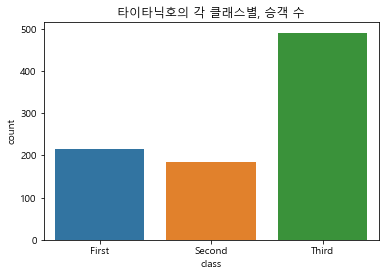

In [9]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

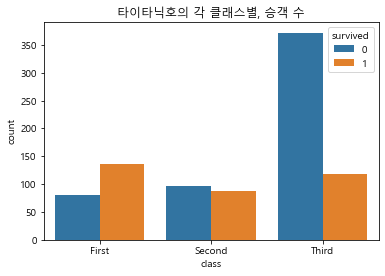

In [40]:
sns.countplot(x="class",hue='survived', data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

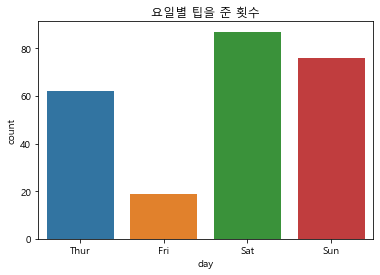

In [10]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [12]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


2차원 실수형 데이터

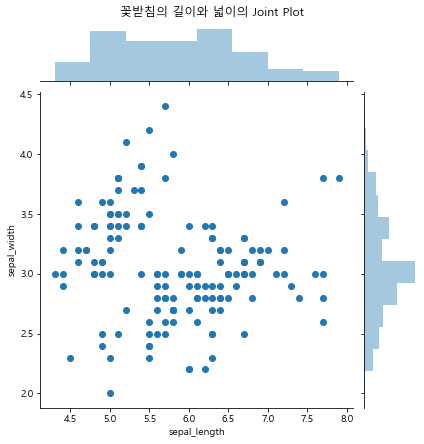

In [13]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

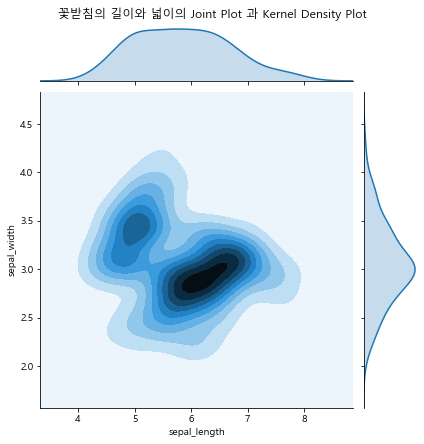

In [14]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

다차원 실수형 데이터

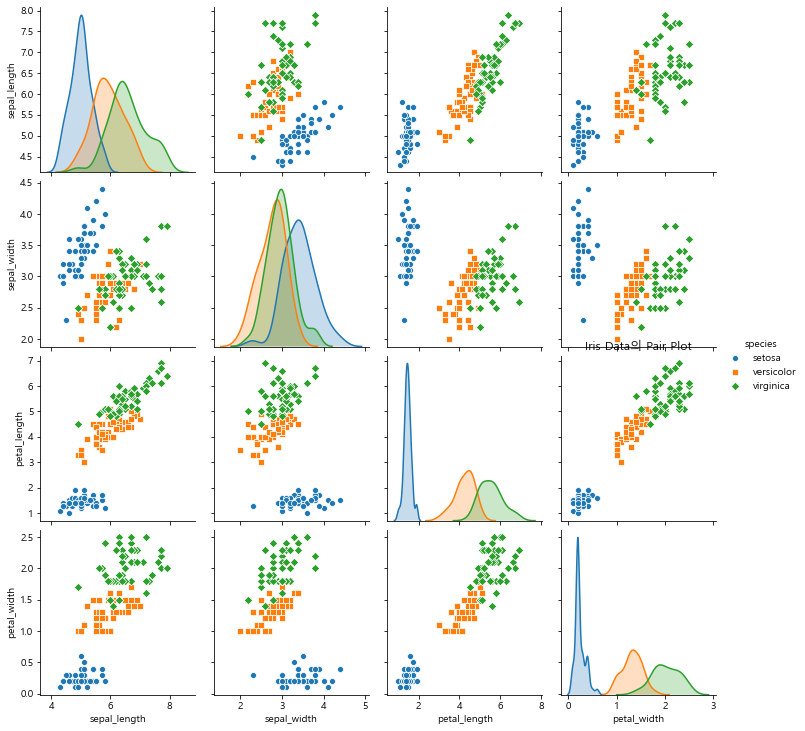

In [16]:
sns.pairplot(iris,  hue="species", markers=["o", "s", "D"])
plt.title("Iris Data의 Pair Plot")
plt.show()

2차원 카테고리 데이터

In [19]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


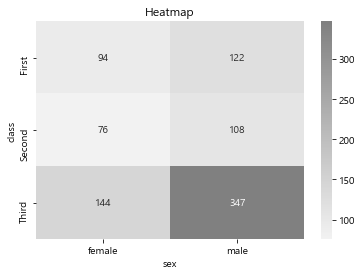

In [20]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

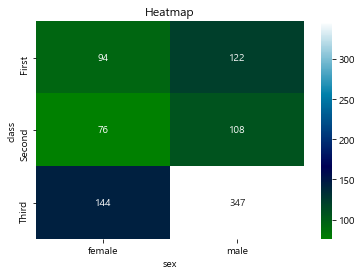

In [22]:
sns.heatmap(titanic_size, cmap='ocean', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()
#colormap 참조 

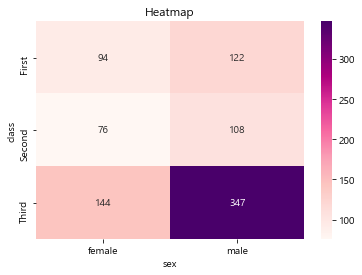

In [24]:
sns.heatmap(titanic_size, cmap='RdPu', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

barplot
boxplot
pointplot
violinplot
stripplot
swarmplot

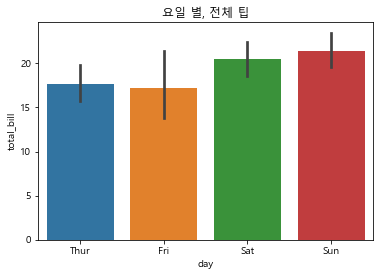

In [25]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

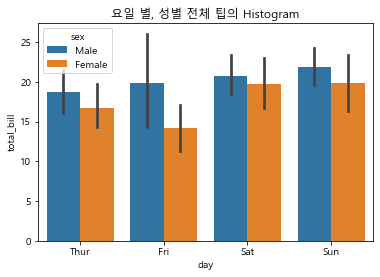

In [39]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

# hue="sex"

In [34]:
mpg = sns.load_dataset('mpg')
def get_mfger(full_name):
    return full_name.split()[0]
def get_model(full_name):
    return ' '.join(full_name.split()[1:])

mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)

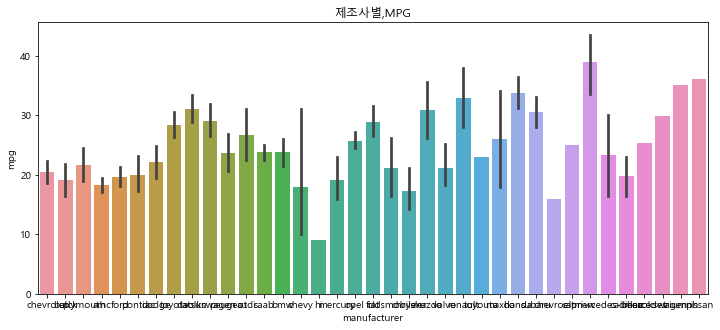

In [36]:
plt.figure(figsize =(12,5))
sns.barplot(x="manufacturer", y="mpg", data=mpg)

plt.title("제조사별,MPG")
plt.show()

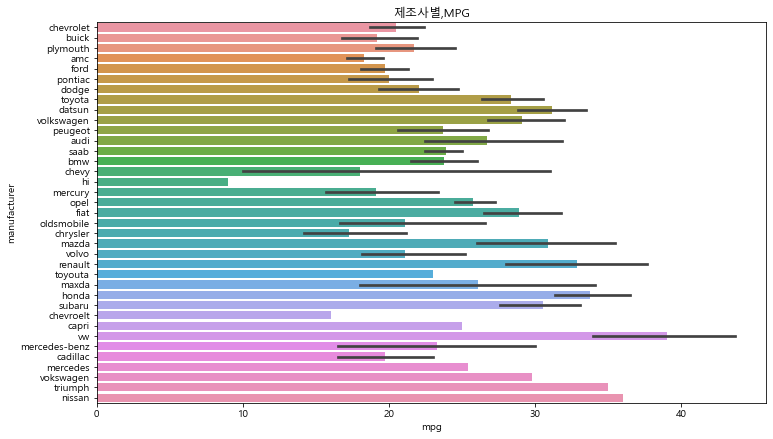

In [38]:
plt.figure(figsize =(12,7))
sns.barplot(y="manufacturer", x="mpg", data=mpg)
plt.title("제조사별,MPG")
plt.show()

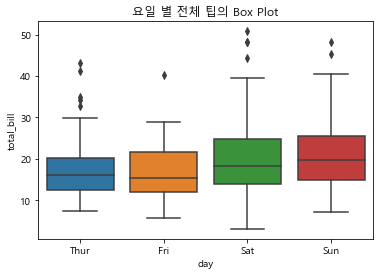

In [26]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

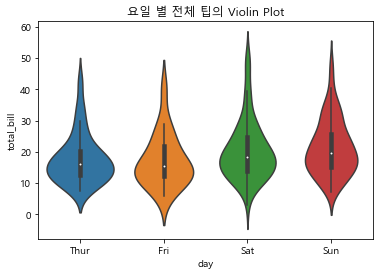

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

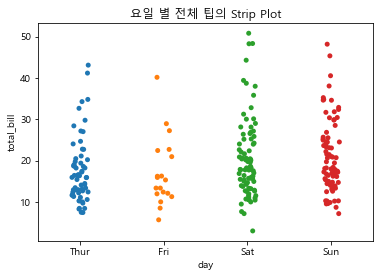

In [28]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

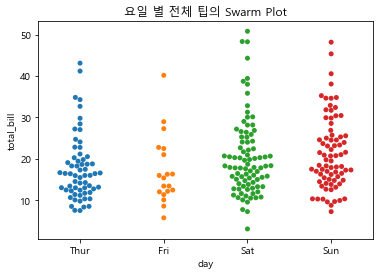

In [29]:
#점이 겹치지 않도록 옆으로 이동한다.
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

다차원 복합 데이터

hue = 

In [41]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [42]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


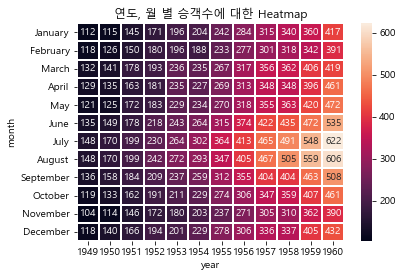

In [43]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

catplot : 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.



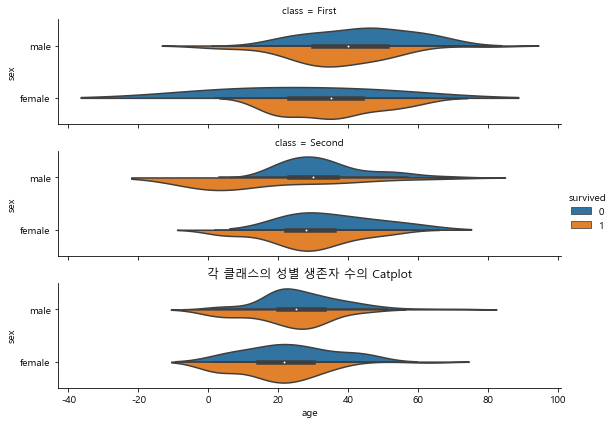

In [44]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()